In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.00,0,0,113055,26.5500,E17,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.00,0,0,113059,47.1000,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.00,1,0,244252,26.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,B22,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.00,0,0,345778,9.5000,NaN,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.00,0,0,PP 4348,9.3500,NaN,S


In [8]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [9]:
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [13]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [14]:
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

In [15]:
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 16, 32, 48, 64, 80], labels=['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior'])
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [16]:
df['Pclass_Age'] = df['Pclass'].astype(str) + '_' + df['AgeBand'].astype(str)
df['Pclass_Fare'] = df['Pclass'].astype(str) + '_' + df['FareBand'].astype(str)

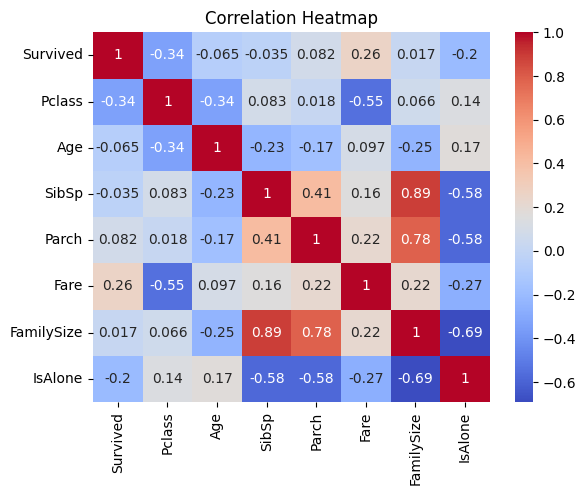

In [17]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeBand,FareBand,Pclass_Age,Pclass_Fare
0,0,3,male,22.0,1,0,7.2500,U,S,2,0,Young Adult,Low,3_Young Adult,3_Low
1,1,1,female,38.0,1,0,71.2833,C,C,2,0,Adult,Very High,1_Adult,1_Very High
2,1,3,female,26.0,0,0,7.9250,U,S,1,1,Young Adult,Medium,3_Young Adult,3_Medium
3,1,1,female,35.0,1,0,53.1000,C,S,2,0,Adult,Very High,1_Adult,1_Very High
4,0,3,male,35.0,0,0,8.0500,U,S,1,1,Adult,Medium,3_Adult,3_Medium
5,0,3,male,28.0,0,0,8.4583,U,Q,1,1,Young Adult,Medium,3_Young Adult,3_Medium
6,0,1,male,54.0,0,0,51.8625,E,S,1,1,Middle-aged,Very High,1_Middle-aged,1_Very High
7,0,3,male,2.0,3,1,21.0750,U,S,5,0,Child,High,3_Child,3_High
8,1,3,female,27.0,0,2,11.1333,U,S,3,0,Young Adult,Medium,3_Young Adult,3_Medium
9,1,2,female,14.0,1,0,30.0708,U,C,2,0,Child,High,2_Child,2_High


In [19]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [20]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [21]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeBand,FareBand,Pclass_Age,Pclass_Fare
331,1,male,1.240235,0,0,-0.074583,C,S,1,1,Adult,High,1_Adult,1_High
733,2,male,-0.488887,0,0,-0.386671,U,S,1,1,Young Adult,Medium,2_Young Adult,2_Medium
382,3,male,0.202762,0,0,-0.488854,U,S,1,1,Young Adult,Medium,3_Young Adult,3_Medium
704,3,male,-0.258337,1,0,-0.490280,U,S,2,0,Young Adult,Low,3_Young Adult,3_Low
813,3,female,-1.795334,4,2,-0.018709,U,S,7,0,Child,Very High,3_Child,3_Very High


In [22]:
y_train.sample(5)

,Survived
191,0
731,0
825,0
530,1
179,0


In [23]:
column_list = list(df.columns)
print(column_list)


['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone', 'AgeBand', 'FareBand', 'Pclass_Age', 'Pclass_Fare']


In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeBand,FareBand,Pclass_Age,Pclass_Fare
0,0,3,male,-0.565736,1,0,-0.502445,U,S,2,0,Young Adult,Low,3_Young Adult,3_Low
1,1,1,female,0.663861,1,0,0.786845,C,C,2,0,Adult,Very High,1_Adult,1_Very High
2,1,3,female,-0.258337,0,0,-0.488854,U,S,1,1,Young Adult,Medium,3_Young Adult,3_Medium
3,1,1,female,0.433312,1,0,0.420730,C,S,2,0,Adult,Very High,1_Adult,1_Very High
4,0,3,male,0.433312,0,0,-0.486337,U,S,1,1,Adult,Medium,3_Adult,3_Medium


In [25]:
trf1 = ColumnTransformer(remainder='passthrough', transformers=[
    ('impute_age', SimpleImputer(), [2]),  # Assuming 'Age' is the 3rd column
    ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6])  # Assuming 'Embarked' is the 7th column
])


In [26]:
trf2 = ColumnTransformer(remainder='passthrough', transformers=[
    ('ohe_sex_embarked', OneHotEncoder(handle_unknown='ignore', sparse=False), [1, 6])  # 'Sex' and 'Embarked'
])


In [27]:
trf3 = ColumnTransformer(transformers=[
    ('scale', MinMaxScaler(), slice(0, 10))  # Scale features 0 to 9
])

In [28]:
trf4 = SelectKBest(score_func=chi2, k=8)

In [29]:
#model=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model=RandomForestClassifier()

In [30]:
pipeline = Pipeline(steps=[
    ('transformer1', trf1),
    ('transformer2', trf2),
    ('transformer3', trf3),
    ('transformer4', trf4),
    ('classifier', model)
])

In [31]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('transformer2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('transformer3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('transformer4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7a5f5113b760>)),
                ('classifier', RandomForestClassifier())])

In [32]:
pipeline.named_steps

{'transformer1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'transformer2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'transformer3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'transformer4': SelectKBest(k=8, score_func=<function chi2 at 0x7a5f5113b760>),
 'classifier': RandomForestClassifier()}

In [33]:
from sklearn import set_config
set_config(display='diagram')

In [34]:
# Predict
y_pred = pipeline.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6927374301675978

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

0.6924554318920516

In [44]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

In [41]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import GridSearchCV
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('classifier__n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('classifier__max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_int('classifier__min_samples_split', 2, 16, step=2)
    min_samples_leaf = trial.suggest_int('classifier__min_samples_leaf', 1, 16, step=1)

    # Set the hyperparameters in the pipeline
    pipeline.set_params(classifier__n_estimators=n_estimators,
                        classifier__max_depth=max_depth,
                        classifier__min_samples_split=min_samples_split,
                        classifier__min_samples_leaf=min_samples_leaf)

    # Cross-validation score
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Create an Optuna study
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=100, n_jobs=-1)

# Print the best hyperparameters
print("Best hyperparameters found: ", study.best_params)

[I 2024-08-09 07:58:15,732] A new study created in memory with name: no-name-be1e61d6-c303-4ea4-9884-80f05f6b6028
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:9

Best hyperparameters found:  {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1}


In [42]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeBand,FareBand,Pclass_Age,Pclass_Fare
331,1,male,1.240235,0,0,-0.074583,C,S,1,1,Adult,High,1_Adult,1_High
733,2,male,-0.488887,0,0,-0.386671,U,S,1,1,Young Adult,Medium,2_Young Adult,2_Medium
382,3,male,0.202762,0,0,-0.488854,U,S,1,1,Young Adult,Medium,3_Young Adult,3_Medium
704,3,male,-0.258337,1,0,-0.490280,U,S,2,0,Young Adult,Low,3_Young Adult,3_Low
813,3,female,-1.795334,4,2,-0.018709,U,S,7,0,Child,Very High,3_Child,3_Very High


In [45]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid.best_params_)

# Use the best model found
best_model = grid.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/p

Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Accuracy: 0.69


In [46]:
grid.best_score_

0.6952723333005023

In [47]:
grid.best_params_

{'classifier__bootstrap': True,
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 100}

In [48]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69
